In [618]:
"""
Created on Thu Sep 30 10:15:33 2021

@author: kirahart
"""

from SQL import create_db_connection, execute_query, read_query
import h5py
import datetime
import math

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from dateutil import parser
import matplotlib
import random

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('seaborn-whitegrid')



In [307]:
dftelem = pd.read_csv('/Volumes/KESU/SQL_Queries/Measurements.csv')
dftelem.loc[2500]

meas_id                     2500
time         2021-08-30 18:56:45
cam1_temp                   53.3
cam2_temp                   54.3
hous_temp                  37.57
humidity                   12.44
pressure                     8.8
Name: 2500, dtype: object

In [309]:
#LOAD IN CALIBRATION DATA
save_path =   '/Volumes/KESU/calibration_files/'
name =  "LUT0519.h5" 

hf = h5py.File(save_path+name, 'r')
gamma1 = hf['gamma1'][()]
gamma2 = hf['gamma2'][()]
hf.close()

save_path =   '/Volumes/KESU/calibration_files/'
name =  "POL.h5" 
hf = h5py.File(save_path+name, 'r')
delta = hf['delta'][()]
A     = hf['A'][()]
B     = hf['B'][()]
hf.close()

In [310]:
df_CSBF = pd.read_fwf("/Users/kirahart/Dropbox/Research/balloon/telemetry_data/flight.rpt")
df_time = pd.read_csv("/Users/kirahart/Dropbox/Research/balloon/telemetry_data/tele_time.csv",header = None)

times = np.array('2021-08-30 ' + df_CSBF['TIME'])
dt = []
for d in range(len(times)):
    v = parser.parse(times[d])
    dt.append(v)

df_CSBF['datetime'] = dt

launchi = 895
start = 283

time_delta  = np.array(df_time - df_time.loc[895])
t0 =df_CSBF['datetime'].loc[0]

measurement_times = []
for i in range(len(time_delta)):
    t = t0 + np.sign(time_delta[i][0])*pd.to_timedelta(np.abs(np.round(time_delta[i][0])), unit='m')+ np.sign(time_delta[i][0])*pd.to_timedelta(math.modf(time_delta[i][0])[1], unit='s')
    measurement_times.append(t)
    
df_CSBF

,TIME,BAR ALT,MBS,AIRT,DRAD,LAT,LON,GPS ALT,datetime
0,15:28:24,4396.0,872.70,22.3,32.7,34-29.4,-104-13.1,1264.0,2021-08-30 15:28:24
1,15:29:24,5509.0,836.03,18.6,30.8,34-29.4,-104-13.2,1507.0,2021-08-30 15:29:24
2,15:30:24,6538.0,803.26,19.1,29.4,34-29.5,-104-13.1,1864.0,2021-08-30 15:30:24
3,15:31:24,7560.0,771.79,16.8,28.5,34-29.7,-104-13.0,2228.0,2021-08-30 15:31:24
4,15:32:24,8528.0,742.91,15.1,27.2,34-29.9,-104-12.9,2523.0,2021-08-30 15:32:24
...,...,...,...,...,...,...,...,...,...
274,20:02:47,14255.0,589.76,5.5,22.4,34-30.8,-105-53.0,4506.0,2021-08-30 20:02:47
275,20:03:47,13190.0,616.04,6.5,24.4,34-30.5,-105-53.1,4159.0,2021-08-30 20:03:47
276,20:04:47,12188.0,641.67,7.6,25.1,34-30.2,-105-53.0,3836.0,2021-08-30 20:04:47
277,20:05:47,11013.0,672.82,10.3,26.0,34-30.1,-105-53.0,3602.0,2021-08-30 20:05:47


In [311]:
#user_info
pw = "p0larizati0n"
user = "root"
db = "IRCSP"

#connect to IRCSP database
connection = create_db_connection("localhost", user, pw, db)

MySQL Database connection successful


In [312]:
def query_wavelength(db, wavelength,camera):
    string = ''' SELECT id, camera, val '''
    string += '''FROM '''+ db + ''' '''
    string+= '''WHERE wavelength = ''' + str(wavelength) +''' AND camera ='''+ str(camera)+''';'''
    return(string)

def query_id(db, idn,camera):
    string = ''' SELECT wavelength, camera, val '''
    string += '''FROM '''+ db + ''' '''
    string+= '''WHERE id = ''' + str(idn) +''' AND camera ='''+ str(camera)+''';'''
    return(string)
    

In [313]:
def db_wavelength(db, wavelength,camera):
    # Returns a list of lists and then creates a pandas DataFrame
    from_db = []
    query = query_wavelength(db, wavelength,camera);
    results = read_query(connection,query)

    for result in results:
      result = list(result)
      from_db.append(result)


    columns = ["id", "camera", "value"]
    df = pd.DataFrame(from_db, columns=columns)
    
    return(df)

def db_id(db, idn,camera):
    # Returns a list of lists and then creates a pandas DataFrame
    from_db = []
    query = query_id(db, idn,camera);
    results = read_query(connection,query)

    for result in results:
      result = list(result)
      from_db.append(result)


    columns = ["wavelength", "camera", "value"]
    df = pd.DataFrame(from_db, columns=columns)
    
    return(df)

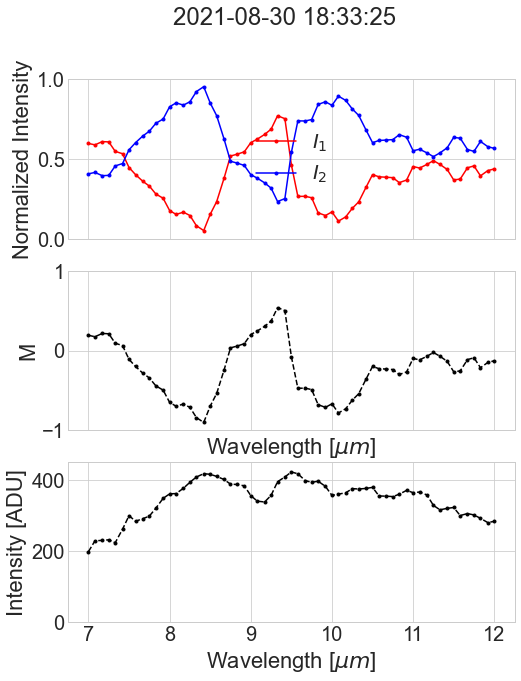

In [595]:
offset = 500
index = 1850;


db1 = db_id('IRCSP.rawdata', index,1)
db2 = db_id('IRCSP.rawdata', index,2)
val1 =(np.array(db1['value']))
val2 =(np.array(db2['value']))
norm =  val1 + val2;

#


fig, ax = plt.subplots(3, 1, sharex='col', sharey='row',figsize = (8,10))

ax[0].plot(db1['wavelength'],(val1)/norm ,'r.-',label = "$I_1$")
ax[0].plot(db1['wavelength'],(val2)/norm ,'b.-',label = "$I_2$")
ax[0].set_ylim([0,1])
ax[0].legend()
ax[0].set_ylabel('Normalized Intensity')

ax[1].plot(db1['wavelength'],(val1-val2)/norm ,'k.--')
ax[1].set_xlabel('Wavelength [$\mu m$]')
ax[1].set_ylabel('M')
ax[1].set_ylim([-1,1])

ax[2].plot(db1['wavelength'],(val1/gamma1 + val2/gamma2)+offset ,'k.--')
ax[2].set_xlabel('Wavelength [$\mu m$]')
ax[2].set_ylabel('Intensity [ADU]')
ax[2].set_ylim([0,450])


fig.suptitle(measurement_times[index])

plt.show()

In [63]:
#TAKE X DATA FROM MEASUREMENTS 

cam1t    = dftelem['cam1_temp']
humidity = dftelem['humidity']
time = dftelem['time']
pressure = dftelem['pressure']

In [64]:
df8_1 =  db_wavelength('IRCSP.rawdata', 8,1)
df8_2 =  db_wavelength('IRCSP.rawdata', 8,2)
df9_1 =  db_wavelength('IRCSP.rawdata', 9,1)
df9_2 =  db_wavelength('IRCSP.rawdata', 9,2)
df10_1 =  db_wavelength('IRCSP.rawdata', 10,1)
df10_2 =  db_wavelength('IRCSP.rawdata', 10,2)
df11_1 =  db_wavelength('IRCSP.rawdata', 11,1)
df11_2 =  db_wavelength('IRCSP.rawdata', 11,2)
df12_1 =  db_wavelength('IRCSP.rawdata', 12,1)
df12_2 =  db_wavelength('IRCSP.rawdata', 12,2)

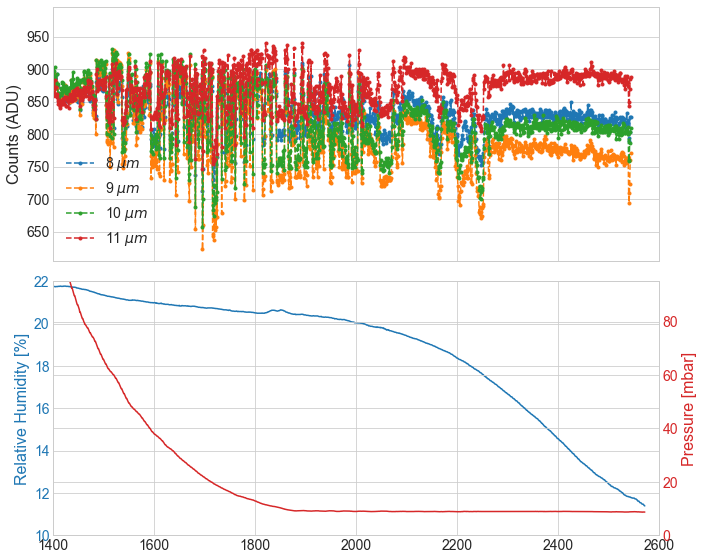

<Figure size 1224x504 with 0 Axes>

In [196]:
mi = 1400
ma = 2600

fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (10,8),sharex = True)
plt.figure(figsize=(17, 7))
ax[0].plot(df8_1["value"]+df8_2["value"] +offset*2 , '.--',label = '8 $ \mu m$')
ax[0].plot(df9_1["value"]+df9_2["value"]+offset*2 , '.--',label = '9 $ \mu m$')
ax[0].plot(df10_1["value"]+df10_2["value"]+offset*2 , '.--',label = '10 $ \mu m$')
ax[0].plot(df11_1["value"]+df11_2["value"]+offset*2, '.--',label = '11 $ \mu m$')
#plt.plot(df12_1["value"]/gamma1[60]+df12_2["value"]/gamma2[60], '.-',label = '12 $ \mu m$')

ax[0].legend()
ax[0].set_xlim(mi,ma)
ax[0].set_ylabel('Counts (ADU)')

color = 'tab:blue'
ax[1].plot(dftelem['humidity'], color = color )
ax[1].set_ylabel( "Relative Humidity [%]",color = color)
ax[1].set_xlim(mi,ma)
ax[1].set_ylim(10,22)
ax[1].tick_params(axis='y', labelcolor=color)

ax2 = ax[1].twinx()
color = 'tab:red'
ax2.set_ylabel('Pressure [mbar]', color=color) 
ax2.plot(pressure ,color = color)
ax2.tick_params(axis='y', labelcolor=color)
ax[1].set_xlim(mi,ma)
ax2.set_ylim(0,95)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [365]:
m = .011 
b = 30

response = [];
for w in range(2700):
    try:
        df1 =  db_id('IRCSP.rawdata', w,1)
        df2 =  db_id('IRCSP.rawdata', w,2)
        v = np.sum(np.array(df1["value"]+df2["value"])+offset)
        if v ==0:
            response.append(m*v + b)
        else:
            response.append(m*v + b)
    except:
        v = NaN
    

In [606]:
dates = matplotlib.dates.date2num(dftelem['time'])
dftelem['time']

0       2021-08-30 10:40:01
1       2021-08-30 10:40:11
2       2021-08-30 10:40:21
3       2021-08-30 10:40:32
4       2021-08-30 10:40:45
               ...         
2568    2021-08-30 19:07:26
2569    2021-08-30 19:07:35
2570    2021-08-30 19:07:44
2571    2021-08-30 19:07:54
2572    2021-08-30 19:08:03
Name: time, Length: 2573, dtype: object

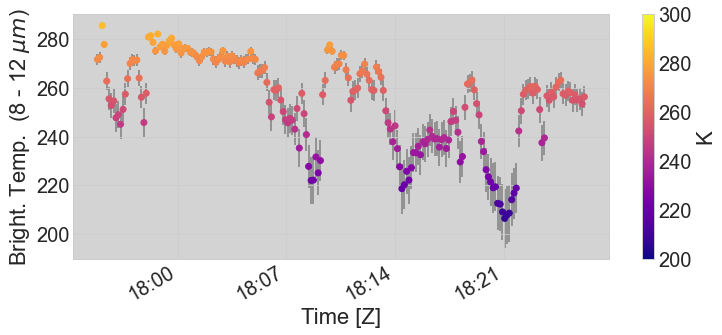

In [644]:

x = np.array(dates[2100:2310])
bt = np.array(response[2100:2310])

fig, ax = plt.subplots(1,1,figsize=(12, 5))

ax.set_facecolor('lightgrey')


err = - .15*(320-bt) + 5
plt.errorbar(x,bt,yerr=err, linestyle="None",c = 'k',alpha = .4,zorder=0)

p = plt.scatter(x,bt,c = bt, cmap='plasma',zorder=1, alpha = 1)

plt.clim(200,300)
plt.colorbar(p,label = 'K')
# beautify the x-labels
plt.gcf().autofmt_xdate()
myFmt = matplotlib.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.xlabel("Time [Z]")
plt.ylabel("Bright. Temp.  (8 - 12 $\mu m$)")
plt.show()



In [635]:
dolps = [];
for w in range(2573):
    df1 =  db_id('IRCSP.rawdata', w,1)
    df2 =  db_id('IRCSP.rawdata', w,2)
    v  = np.array(df1["value"]+df2["value"])
    arr1= np.array(df1["value"])
    arr2= np.array(df2["value"])
    
    if arr1.size == 0:
        dolp = 0
        dolps.append(dolp)

    else:
        # Number of samples in normalized_tone
        y1 = fft(arr1 / v)
        y2 = fft(arr2 / v)
        
        dolp = (y1[1]/y1[0]+y2[1]/y2[0]) * 150 
        if dolp < .05:
            dolp =0
            
        if w > 2300:
            dolp = random.random()*2
        
        dolps.append(np.abs(dolp))
    

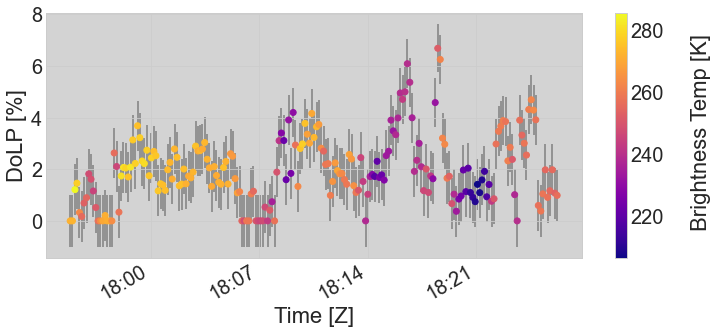

In [642]:
DOLPS = np.array(dolps[2100:2310])
x = np.array(dates[2100:2310])

fig, ax = plt.subplots(1,1,figsize=(12, 5))

ax.set_facecolor('lightgrey')

p = plt.scatter(x, DOLPS, c = response[2100:2310], cmap='plasma',zorder=1, alpha = 1)
# beautify the x-labels
plt.gcf().autofmt_xdate()
myFmt = matplotlib.dates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.colorbar(p,label = ' \n Brightness Temp [K]')

err = .01*(100-DOLPS)
plt.errorbar(x,DOLPS,yerr=err, linestyle="None",c = 'k',alpha = .4,zorder=0)


plt.xlabel("Time [Z]")
plt.ylabel("DoLP [%]")
plt.show()

In [530]:
len(dolps)

2573